# TP 5 : Spectroscopie 3D par transform√©e de Fourier en astronomie

Thomas Martin: thomas.martin.1@ulaval.ca

Philippe Despr√©s: philippe.despres@phy.ulaval.ca

## Introduction

### SITELLE

<img src="http://celeste.phy.ulaval.ca/links/tp1/sitelle.png" alt="SITELLE" title="SITELLE au CFHT" width=300/>

SITELLE est un spectro-imageur √† transform√©e de Fourier (Drissen et al. 2019, https://arxiv.org/pdf/1811.06644.pdf) install√© au t√©l√©scope Canada-France-Hawaii depuis 2015. Il a √©t√© con√ßu et construit dans le cadre d'une collaboration entre le Pr. Laurent Drissen (Universit√© Laval) et la firme qu√©becoise ABB-Bomem (Qu√©bec). Cet instrument unique en son genre permet d'obtenir un spectre pour chaque pixel d'une image d'environ 2000x2000 pixels soit 4 millions de spectres en une seule observation. Au coeur de cet instrument se trouve un interf√©rom√®tre de Michelson dont une repr√©sentation tr√®s simplifi√©e est donn√©e ci-dessous.

### Principe de fonctionnement 

<img src="michelson.png" alt="Michelson" title="Michelson" width=300/>

D'une mani√®re g√©n√©rale, un interf√©rom√®tre est un montage optique qui permet d'obtenir l'√©quivalent de la transform√©e de Fourier **inverse** du spectre de la source observ√©e : un **interf√©rogramme**. La transform√©e de Fourier **directe** de l'interf√©rogramme obtenu permet ensuite de retrouver le contenu spectral (le spectre) de la source de lumi√®re observ√©e. 

Dans un interf√©rom√®tre de Michelson, la lumi√®re de la source est s√©par√©e au niveau de la lame  s√©paratrice (qui est une lame semi-r√©l√©chissante) en deux faisceaux : une moiti√© est transmise √† travers la lame et se dirige vers le miroir mobile, tandis que l'autre est r√©fl√©chie sur la lame pour √™tre dirig√©e vers le miroir fixe. Les deux miroirs r√©fl√©chissent √† nouveau ces deux faisceau pour les faire interf√©rer au niveau de la lame semi-r√©fl√©chissante. Des deux faisceaux r√©sultant de cette interf√©rence, l'un retourne vers la source tandis que l'autre est dirig√©e vers une cam√©ra. Si $x$ est la diff√©rence de marche optique entre les deux faisceaux r√©fl√©chis par les miroirs, le r√©sultat de l'interf√©rence est un signal dont l'amplitude $I(x)$ s'√©crit comme la transform√©e de Fourier inverse du spectre $S(\sigma)$ de la source:

(1) $I(x) = \int S(\sigma) e^{2i\pi \sigma x} \text{d}\sigma$

Notez bien que le spectre est √©tabli en fonction du **nombre d'onde** $\sigma$. Un nombre d'onde est l'√©quivalent d'une fr√©quence est s'√©crit simplement comme l'inverse d'une longueur d'onde $\lambda$ : $\sigma = \frac{1}{\lambda}$. Dans le cadre de ce TP, l'unit√© utilis√©e pour les nombres d'onde est le cm$^{-1}$. Pour votre information lorsque $\lambda$ est donn√© en nm, $\sigma [\text{cm}^{-1}]= 10^7 / \lambda [\text{nm}]$.

Pour √©chantillonner un interf√©rogramme, le miroir mobile est d√©plac√© pas par pas tandis que le miroir fixe reste √† la m√™me distance de la s√©paratrice. De cette fa√ßon, la diff√©rence de marche entre les deux faisceaux est modifi√©e (donc $x$ change) et l'on est en mesure d'√©chantillonner l'interf√©rogramme (vous trouverez plus bas deux exemples d'interf√©rogrammes obtenus en observant le ciel nocturne et en observant une r√©gion de la n√©buleuse M57). La transform√©e de Fourier directe de l'interf√©rogramme obtenu permet th√©oriquement de retrouver le spectre de la source observ√©e :

(2) $S(\sigma) = \int I(x) e^{-2i\pi \sigma x} \text{d}x$

La cam√©ra poss√®de un grand nombre de pixel et il est donc possible d'obtenir un interf√©rogramme pour chaque source situ√©e dans son champ de vue, d'o√π la qualification de spectrom√®tre-imageur d'un instrument comme SITELLE. La lumi√®re de ces sources est √† un angle d'incidence $\theta$ de l'axe optique. Dans le cas de SITELLE, et pour des raisons qui d√©passent le cadre de ce TP, aucune source n'est observ√©e le long de l'axe optique. La carte de l'angle d'incidence $\theta$ est donn√©e plus bas.


### Donn√©es

√Ä chaque position du miroir mobile (on parle de "pas"), une image interf√©rom√©trique est obtenue sur la cam√©ra. Une observation est la r√©union des images prisent √† chaque pas du miroir mobile sous la forme d'un **cube de donn√©es interf√©rom√©triques**. Les 4 millions d'interf√©rogrammes obtenus sont ensuite transform√©s en autant de spectres pour produire un **cube spectral** (on parle de donn√©es hyperspectrales).

<img src="sitelle-data.png" alt="Cubes" title="Les donn√©es de SITELLE" width=800/>

Nous allons travailler sur une sous-section d'un cube de donn√©es obtenu en 2015 sur la n√©buleuse plan√©taire M57 (https://fr.wikipedia.org/wiki/N%C3%A9buleuse_de_la_Lyre). Ce cube de donn√©es a fait l'objet d'un article (Martin et al, 2016 https://arxiv.org/pdf/1608.05854.pdf). Vous allez devoir transformer le cube interf√©rom√©trique en un cube spectral et reproduire les principaux r√©sultats de cette √©tude. Le cube a √©t√© r√©duit (pr√©-trait√©) pour vous, question d'enlever quelques √©tapes critiques mais laborieuses dans le traitement des donn√©es brutes (par ex. d√©termination du flux, suppression des rayons cosmiques).

Voici l'image profonde (*deep frame*) obtenue lorsque toutes les images interf√©rom√©triques sont somm√©es. Comme vous le voyez, la n√©buleuse plan√©taire occupe le centre du champ. On distingue m√™me, au centre de celle-ci, la naine blanche dont le rayonnement ultraviolet excite le gaz environnant et qui est √† l'orgine de la n√©buleuse. Comme chaque pixel de cette image est reli√© √† un spectre, nous pouvons donc √©tudier les spectres des √©toiles, du ciel environnant et bien s√ªr de chaque r√©gion de la n√©buleuse.

<img src="df.png" alt="Dee frame" title="Image profonde" width=700/>

Plus bas vous trouverez un interf√©rogramme du 'ciel' et le spectre associ√© qui pr√©sente un continu (√©mission thermique de corps noir) et des raies d'√©mission (√©mission de fluorescence). L'absence de signal √† droite et √† gauche du spectre est li√© √† la pr√©sence d'un filtre optique devant l'instrument (d√©limit√© par les lignes oranges). √Ä l'int√©rieur du filtre, on observe du signal √† toutes les longueurs d'onde, ce qui n'est pas le cas du spectre de la n√©buleuse o√π l'on n'observe de l'√©mission qu'√† 5 longueurs d'onde particuli√®res : ce sont les 5 raies d'√©mission produites par la d√©sexcitation des atomes du milieu interstellaire ionis√©s par la naine blanche (hydrog√®ne, azote et soufre).

<img src="exemples_raies.png" alt="Raies d'√©mission" title="" width=1000/>

## Transformation des donn√©es interf√©rom√©triques

### Chargement du cube de donn√©es

Le cube avec lequel vous allez travailler est sauvegard√© au format FITS. C'est un format commun en astronomie. Vous pouvez y acc√©der en utilisant la librairie astropy (https://www.astropy.org/). Ce cube contient 593 images interf√©rom√©triques de 775 x 773 pixels. Une fois charg√©, ce cube se pr√©sente sous la forme d'un tableau numpy.ndarray 3D. Attention, ici le format FITS est historiquement li√© au langage FORTRAN et l'arrangement des donn√©es en m√©moire est diff√©rent de ce qui est fait normalement avec NumPy, qui par d√©faut organise les donn√©es selon un ordre qualifi√© de *row-major* (param√®tre *order='F'* pass√© lors de la cr√©ation du *numpy.ndarray*: row-major (C-style) vs column-major (Fortran-style) order).

In [1]:
import numpy as np
import pylab as pl
import astropy.io.fits
import scipy
import scipy.optimize
import tplib # librairie de fonctions utiles
from importlib import reload
import matplotlib.pyplot as plt 

In [2]:
cube_interf = astropy.io.fits.getdata('M57_cube.fits')
cube_interf.shape

(593, 773, 775)

### Extraction d'un interf√©rogramme du ciel

Commen√ßons par extraire un interf√©rogramme du ciel, en choissisant un pixel √† la coordonn√©e (15,15) qui est en dehors de la zone couverte par la n√©buleuse. 

Text(0.5, 0, 'index du pas')

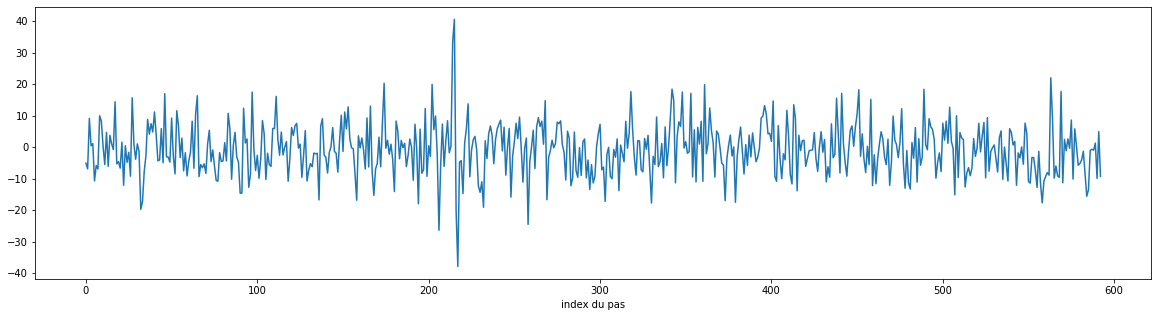

In [3]:
sky_interf = cube_interf[:,15,15]
pl.figure(figsize=(20,5))
pl.plot(sky_interf)
pl.xlabel("index du pas")

Cet interf√©rogramme est plut√¥t bruit√©. Pour augmenter le rapport signal-sur-bruit, nous allons calculer la moyenne  des intef√©rogrammes obtenus sur une surface de 30x30 pixels (autour du pixel 15,15) dans une r√©gion exempte d'√©mission n√©bulaire.

Text(0.5, 0, 'index du pas')

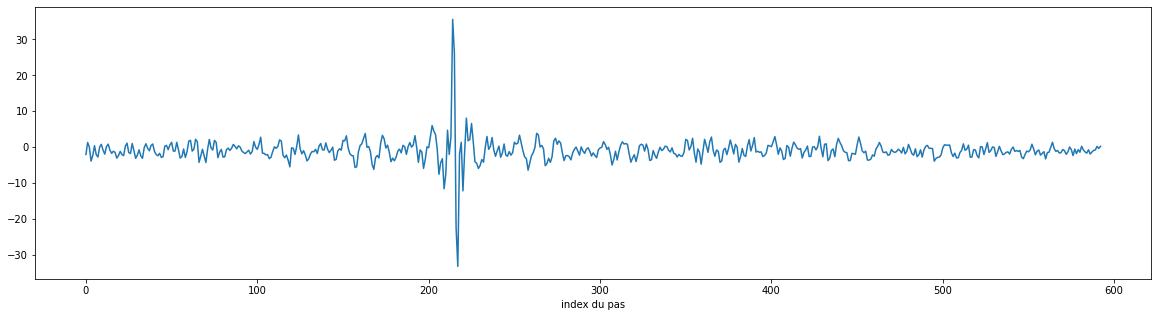

In [4]:
sky_interf = np.mean(cube_interf[:,:30,:30], axis=(1,2))
pl.figure(figsize=(20,5))
pl.plot(sky_interf)
pl.xlabel("index du pas")

### Transformation de Fourier

La transformation de Fourier directe repose sur l'impl√©mentation de l'√©quation (2) en version discr√®te. Sous une forme na√Øve, cette √©quation est particuli√©rement longue √† calculer, mais il existe une impl√©mentation rapide, la FFT (Fast Fourier Transform) qui permet d'acc√©l√©rer substantiellement les calculs. Avec la routine *numpy.fft.fft*, le vecteur complexe obtenu en sortie est de m√™me dimension que l'interf√©rogramme en entr√©e. 

**Question 1** - Obtenez le spectre de la portion 'ciel' avec  *numpy.fft.ftt* (en utilisant l'interf√©rogramme moyenn√© calcul√© pr√©c√©demment). Historiquement, les routines FFT placent la fr√©quence 0 dans le premier √©l√©ment du vecteur de sortie, puis les fr√©quences positives croissantes dans la premi√®re moiti√© de ce vecteur et les fr√©quences n√©gatives d√©croissantes (en valeur absolue) dans la deuxi√®me moiti√©. Une fa√ßon de ramener dans un ordre plus naturel est d'utiliser *fftshift*, qui ram√®ne le tout en ordre croissant avec la fr√©quence 0 au milieu. Affichez la partie r√©elle du vecteur de sortie, apr√®s l'application de *fftshift*. Prenez soin d'ajuster la ratio largeur/hauteur de votre graphique, par exemple avec *pylab.figure(figsize=(20,5))*.
Ne vous souciez pas pour l'instant des valeurs en abcisse sur votre graphique, nous y viendrons plus tard.






Text(0.5, 0, 'Index du pas')

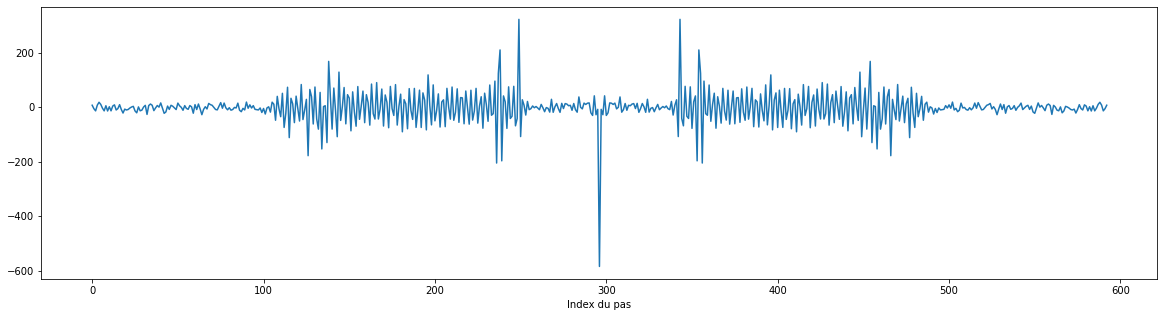

In [5]:
fft_ciel = np.fft.fft(sky_interf) # fft de la fonction
fft_ciel_shift = np.fft.fftshift(fft_ciel) # Ramener le vecteur dans un ordre plus naturel

pl.figure(figsize=(20,5))
pl.plot(fft_ciel_shift.real)  # Afficher la partie r√©elle du vecteur de sortie
pl.xlabel("Index du pas")

**Question 2** - Si tout va bien, le spectre obtenu est sym√©trique. Pourquoi en est-il ainsi?


Les coefficients de la transform√©e de Fourier discr√®te entre $N/2$ et $N$, o√π $N$ est le nombre de pas utilis√© pour faire la discr√©tisation, sont le complexe conjugu√© des coefficients compris entre 0 et $N/2$. Comme on consid√®re la partie r√©elle ici, il est normal d'obtenir un spectre sym√©trique.

**Question 3** -
D√©montrez math√©matiquement que le premier √©l√©ment en sortie de *numpy.fft.fft* est simplement la somme des valeurs de l'interf√©rogramme (calculez aussi cette somme et comparez-la √† l'√©l√©ment appropri√© √† la sortie de *numpy.fft.fft*). Il s'agit en quelque sorte d'un d√©calage du signal (*offset*), d√ª par exemple √† un courant de fuite au d√©tecteur,  qui ne contient pas d'information utile. Aussi, vous pourriez simplement mettre cette valeur √† 0 dans le vecteur de sortie. De fa√ßon √©quivalente, vous pourriez soustraire la moyenne de l'interf√©rogramme (pour que sa somme soit nulle) et calculer √† nouveau la FFT du nouvel interf√©gramme. C'est ce que vous ferez, en v√©rifiant que la composante √† la fr√©quence 0 est bien nulle (dans les limites de la pr√©cision machine). Affichez le r√©sultat (la partie r√©elle, apr√®s *fftshift*).

**D√©monstration math√©matique :**

Les coefficients $c_k$ de la transform√©e de Fourier discr√®te se calculent comme suit :
$$ c_k = \sum_{n=0}^{N-1}y_n\exp\left(-i\frac{2\pi kn}{N}\right) $$

Le premier coefficient, soit quand $k=0$, vaut alors :
$$ c_0 = \sum_{n=0}^{N-1}y_n $$

Par cons√©quent, le premier √©l√©ment en sortie de *numpy.fft.fft* est simplement la somme des valeurs de l'interf√©rogramme.

In [6]:
# Pour comparer que le premier √©l√©ment en sortie de numpy.fft.fft est simplement la somme des valeurs de 
# l'interf√©rogramme :
print(fft_ciel.real[0])  # Premier √©l√©ment en sortie de numpy.fft.fft
print(sum(sky_interf))   # Somme des valeurs de l'interf√©rogramme
# C'est donc vrai.

-583.9161266326845
-583.9161266326846


1.1368683772161603e-13


Text(0.5, 0, 'Index du pas')

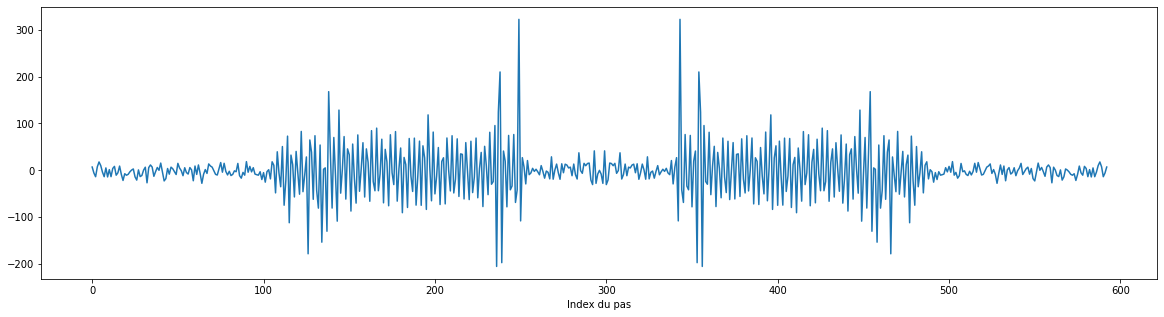

In [7]:
fft_ciel = np.fft.fft(sky_interf) # fft de la fonction
fft_ciel.real[0] -= sum(sky_interf)  # Soustraire la moyenne de l'interf√©rogramme pour que la composante √† la 
# fr√©quence 0 soit nulle 
print(fft_ciel.real[0])  # Pour v√©rifier que la composante √† la fr√©quence 0 est bien nulle (dans les limites 
# de la pr√©cision machine), ce qui est le cas.
fft_ciel_shift = np.fft.fftshift(fft_ciel) # Ramener le vecteur dans un ordre plus naturel

pl.figure(figsize=(20,5))
pl.plot(fft_ciel_shift.real)  # Afficher la partie r√©elle du vecteur de sortie
pl.xlabel("Index du pas")

Il reste √† trouver √† quoi correspondent les valeurs en abcisse qui jusqu'ici ne repr√©sentent que l'index du vecteur de sortie, ou le nombre $k$ dans la d√©finition de la transform√©e de Fourier plus haut. Pour $n$ signaux √©chantillonn√©s avec un intervalle $d$, la fonction *numpy.fft.freq* retourne les fr√©quences correspondantes, qui sont (voir doc de la fonction)

$$freq = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)  $$ si $n$ est pair
ou
$$freq = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)  $$ si $n$  est impair. 
 
o√π vous remarquerez l'ordre utilis√© pour des raisons historiques, qu'il est possible de changer facilement avec *fftshift*.
 
Dans le cas particulier de SITELLE, l'√©talonnage du spectre en nombre d'onde n'est pas trivial et d√©pend de l'angle d'incidence $\theta$ de la lumi√®re, autrement dit de la position du pixel dans le champ de vue (la longueur des parcours optiques d√©pend de la position sur le d√©tecteur). L'angle d'incidence que vous devez utiliser est rapport√© sous la forme d'une carte ('theta.fits') qui donne, pour chaque pixel, l'angle d'incidence de la lumi√®re. 

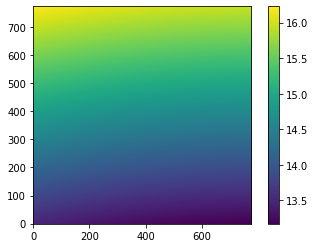

In [8]:
theta_map = astropy.io.fits.getdata('theta.fits')
pl.imshow(theta_map, origin='lower')
pl.colorbar()

Par exemple, l'angle correspondant au centre de la r√©gion 30x30 (√† la position (15,15)) du ciel consid√©r√© plus haut est

In [9]:
print(theta_map[15,15], 'degr√©s')

13.53542 degr√©s


Nous allons consid√©rer ici que l'angle au centre de la r√©gion (au pixel (15,15)) est repr√©sentatif de toute la r√©gion, qui est somme toutes assez petite.

La fonction fournie *tplib.get_cm1_axis(theta)* retourne l'axe du spectre en nombre d'onde d'un spectre calcul√© par FFT, pour sa moiti√© o√π les nombres d'onde sont positifs (soit la premi√®re moiti√© du vecteur retourn√© par *numpy.fft.fft*). D'un point de vue physique, seul les nombres d'onde positifs ont un sens. Le vecteur retourn√© par *tplib.get_cm1_axis(theta)*  a la m√™me taille que l'interf√©rogramme, soit 593 ici. Il faut alors trouver un moyen de repr√©senter la moiti√© positive du spectre sur 593 valeurs (et non la moiti√© seulement, tel que serait le cas en soumettant l'interf√©rogramme original √† *numpy.fft.fft*). Une fa√ßon d'y arriver est d'ajouter des z√©ros (zero-padding) au bout de notre interf√©rogramme. Cette op√©ration n'influence pas le spectre obtenu, seulement le nombre de points o√π il est repr√©sent√©. On peut donc ajouter 593 z√©ros au bout de notre interf√©rogramme pour que *numpy.fft.fft* retourne un vecteur de longueur 1186, dont la premi√®re moiti√© (de 593 valeurs) correspond aux nombres d'ondes recherch√©s (fournie par l'appel √† *tplib.get_cm1_axis(theta_map[15,15])*). La routine *numpy.fft.fft* peut faire ce *zero-padding* pour vous, via le param√®tre $n$. 

**Question 5** - Effectuez cette op√©ration et affichez la partie r√©elle du spectre obtenu, qui cette fois sera calibr√© correctement en abcisse (en $cm^{-1})). Gardez l'habitude de soustraire la moyenne de l'interf√©rogamme (soustraire sa composante DC en quelque sorte).


Text(0.5, 0, "Nombre d'onde [cm$^{-1}$]")

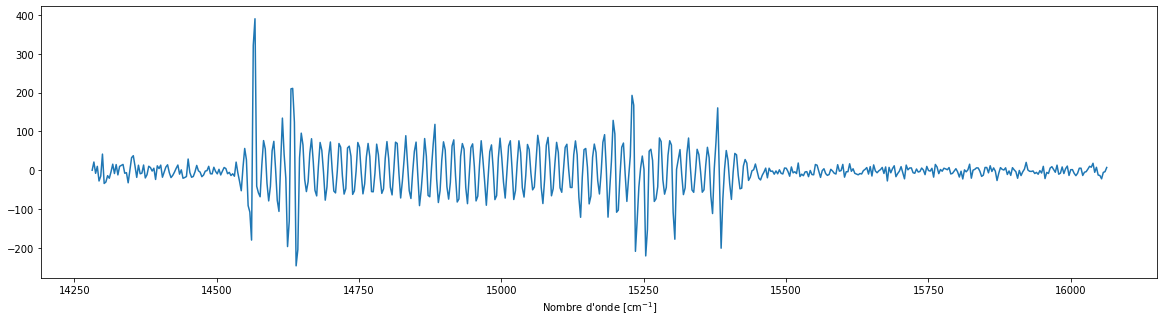

In [10]:
nb_onde_ciel = tplib.get_cm1_axis(theta_map[15,15])

fft_ciel = np.fft.fft(sky_interf, n=1186) # fft de la fonction avec un zero-padding pour avoir 593 valeurs positives
fft_ciel.real[0] -= sum(sky_interf)   # Soustraire la moyenne de l'interf√©rogramme pour que la composante √† la 
# fr√©quence 0 soit nulle 
fft_ciel_shift = np.fft.fftshift(fft_ciel) # Ramener le vecteur dans un ordre plus naturel

pl.figure(figsize=(20,5))
pl.plot(nb_onde_ciel, fft_ciel_shift.real[593:])  # Afficher la partie r√©elle et positive du vecteur de sortie
pl.xlabel("Nombre d'onde [cm$^{-1}$]")

### Correction de phase

Malheureusement, nous ne sommes pas encore au bout de nos efforts. Le spectre obtenu contient une phase non-nulle qui n'a pas √©t√© corrig√©e, ce qui se traduit par des valeurs aberrrantes (n√©gatives). Cette phase correspond essentiellement au d√©calage $\delta x$ entre la valeur mesur√©e de la position du miroir mobile et la valeur r√©elle. Les d√©fauts de plan√©it√© des optiques et la non-lin√©arit√© de l'indice de r√©fraction de la lumi√®re en fonction de la longueur d'onde ont aussi un impact important sur le terme de phase qui n'est pas une constante mais d√©pend d'une fa√ßon plus ou moins complexe de la longueur d'onde et du trajet parcouru par la lumi√®re dans l'instrument, autrement dit de son angle d'incidence.

Math√©matiquement, l'interf√©rogramme mesur√© avec le d√©calage $\delta x$ est 

$$\hat{I}(x) = \int S(\sigma) e^{2i\pi \sigma (x + \delta x)} \text{d}\sigma$$

$$\hat{I}(x) = \int S(\sigma) e^{2i\pi \sigma x} e^{i\phi(\sigma)}\text{d}\sigma$$

avec $\phi(\sigma) = 2\pi \sigma \delta x$.

Le spectre correspondant √† l'interf√©rogramme $\hat{I}$ est

$$\hat{S}(\sigma) = \int \hat{I}(x) e^{2i\pi \sigma x} \text{d}x$$

ce qui permet de voir que $\hat{S}(\sigma)$ et $S(\sigma)$ diff√®rent par un facteur $e^{i\phi(\sigma)}$:

$$\hat{S}(\sigma) =S(\sigma)e^{i\phi(\sigma)}$$

et que le spectre corrig√© en phase est obtenu par
 
$$S(\sigma)=\hat{S}(\sigma)e^{-i\phi(\sigma)}.$$

Heureusement, nous pouvons mesurer cette phase directement apr√®s la transformation de Fourier √† partir de ses parties r√©elles et imaginaires:

$$\phi(\sigma) = \tan^{-1}\left(\frac{\operatorname{Im}(\hat{S})}{\operatorname{Re}(\hat{S})}\right).$$

Le bout de code suivant calcule $\phi(\sigma)$, pour un spectre non-corrig√© contenu dans la variable *sky_spectrum_hat* (la phase retourn√©e par la fonction arctan2 √©tant une valeur entre  ‚àíùúã  et  ùúã , celle-ci doit √™tre *d√©roul√©e* pour qu'elle fasse du sens; la fonction *numpy.unwrap()* sert exactement √† √ßa). Le code pr√©sume que le r√©sultat de votre transform√©e de Fourier est dans la variable *sky_spectrum_hat*.

Text(0, 0.5, '$\\phi(\\sigma)$')

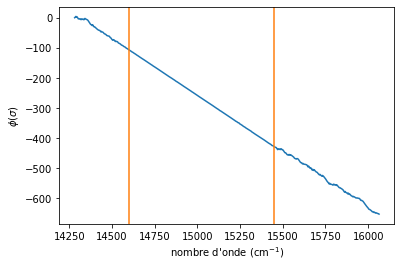

In [11]:
# Ici, la variable sky_spectrum_hat se nomme plut√¥t fft_ciel_shift. On regarde seulement la deuxi√®me moiti√© de 
# l'array pour avoir des valeurs positives de nombres d'onde.

sky_phase = np.unwrap(np.arctan2(fft_ciel_shift[593:].imag, fft_ciel_shift[593:].real))
sky_axis = tplib.get_cm1_axis(theta_map[15,15])
pl.plot(sky_axis, sky_phase)
pl.axvline(tplib.FILTER_MIN, c='tab:orange')
pl.axvline(tplib.FILTER_MAX, c='tab:orange')
pl.xlabel("nombre d'onde (cm$^{-1}$)")
pl.ylabel("$\phi(\sigma)$")

Le graphique produit montre aussi la zone o√π le signal d'entr√©e n'est pas filtr√©. En dehors de cette zone, il y a tr√®s peu de signal et les valeur sont moins fiables. Aussi, nous allons utiliser une r√©gression lin√©aire sur la plage des nombres d'onde situ√©s dans la bande passante du filtre pour d√©crire la phase en fontion du nombre d'onde.

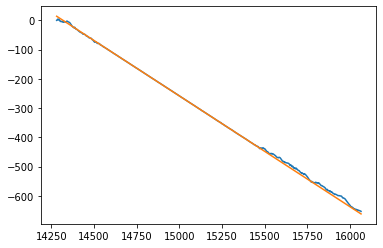

In [12]:
#indice du vecteur correspondant √† la limite inf√©rieure du filtre
index_low=int(tplib.cm12pix(tplib.FILTER_MIN, theta_map[15,15]))
#indice du vecteur correspondant √† la limite sup√©rieure du filtre
index_high=int(tplib.cm12pix(tplib.FILTER_MAX, theta_map[15,15]))

phase_coeffs = np.polyfit(sky_axis[index_low:index_high], sky_phase[index_low:index_high], 1)
sky_phase_fit = np.polyval(phase_coeffs, sky_axis)
pl.plot(sky_axis, sky_phase)
pl.plot(sky_axis, sky_phase_fit)

**Question 6** - La droite que vous avez ajust√©e peut-√™tre utilis√©e directement comme une estimation de la phase $\phi(\sigma)$. Calculez maintenant la version corrig√©e en phase du spectre correspondant √† la partie 'ciel' des donn√©es et affichez sa partie r√©elle.

Text(0.5, 0, "Nombre d'onde [cm$^{-1}$]")

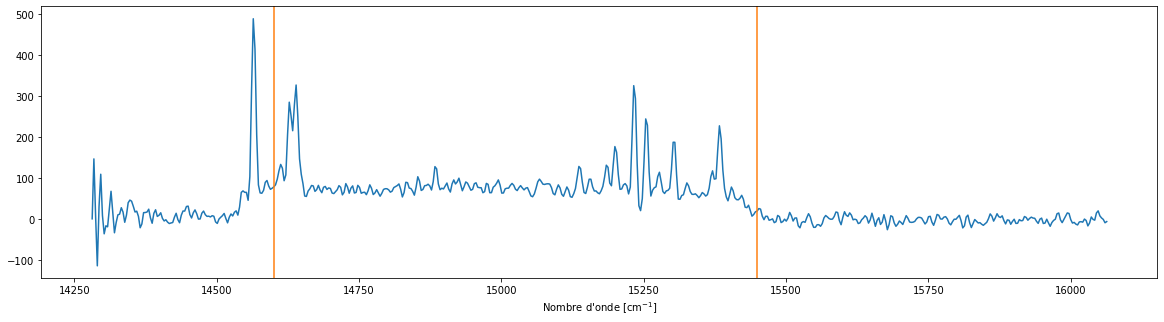

In [13]:
fft_ciel = np.fft.fft(sky_interf, n=1186) # fft de la fonction avec un zero-padding pour avoir 593 valeurs positives
fft_ciel.real[0] -= sum(sky_interf)   # Soustraire la moyenne de l'interf√©rogramme pour que la composante √† la 
# fr√©quence 0 soit nulle 
fft_ciel_shift = np.fft.fftshift(fft_ciel) # Ramener le vecteur dans un ordre plus naturel

fft_ciel_shift[593:] *= np.exp(-1j*sky_phase_fit)   # Corriger la phase du spectre

pl.figure(figsize=(20,5))
pl.plot(nb_onde_ciel, fft_ciel_shift.real[593:])  # Afficher la partie r√©elle et positive du vecteur de sortie
pl.axvline(tplib.FILTER_MIN, c='tab:orange')
pl.axvline(tplib.FILTER_MAX, c='tab:orange')
pl.xlabel("Nombre d'onde [cm$^{-1}$]")

Deux aspects de cette figure sous-entendent que le r√©sultat obtenu est incorrect. Tout d'abord, on retrouve encore des valeurs n√©gatives au d√©but du spectre. Deuxi√®mement, des raies d'√©mission sont observ√©es l√† o√π le signal devrait √™tre filtr√©. Pour le premier point, on voit √† la figure suivante que des valeurs positives sont obtenues sur tout le spectre si on travaille avec la phase exacte du spectre plut√¥t qu'avec la phase d√©termin√©e gr√¢ce √† une r√©gression lin√©aire. Cela peut donc s'expliquer par le fait qu'une r√©gression lin√©aire repr√©sente inad√©quatement la variation de phase pour cette portion de spectre. On juge cette erreur acceptable vu qu'il y a peu de signal √† cet endroit et que les valeurs y sont moins fiables. Pour le deuxi√®me point, on suppose que la bande-passante du filtre utilis√© exp√©rimentalement diff√®re de celle attendue ici. Une deuxi√®me hypoth√®se est que le vecteur de nombres d'onde calcul√© gr√¢ce √† *tplib.get_cm1_axis(theta_map[15,15]))* est l√©g√®rement d√©cal√© vers les bas nombres d'onde comparativement √† ce qui serait attendu.

Text(0.5, 0, "Nombre d'onde [cm$^{-1}$]")

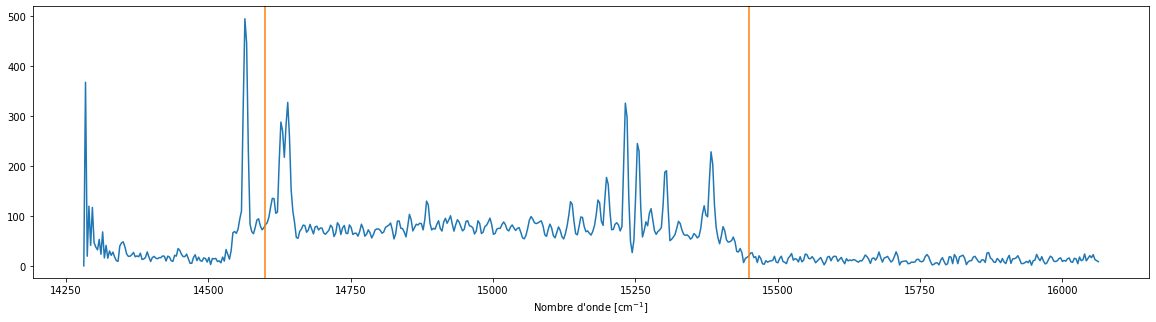

In [14]:
fft_ciel = np.fft.fft(sky_interf, n=1186) # fft de la fonction avec un zero-padding pour avoir 593 valeurs positives
fft_ciel.real[0] -= sum(sky_interf)   # Soustraire la moyenne de l'interf√©rogramme pour que la composante √† la 
# fr√©quence 0 soit nulle 
fft_ciel_shift = np.fft.fftshift(fft_ciel) # Ramener le vecteur dans un ordre plus naturel

fft_ciel_shift[593:] *= np.exp(-1j*sky_phase)   # Corriger la phase du spectre

pl.figure(figsize=(20,5))
pl.plot(nb_onde_ciel, fft_ciel_shift.real[593:])  # Afficher la partie r√©elle et positive du vecteur de sortie
pl.axvline(tplib.FILTER_MIN, c='tab:orange')
pl.axvline(tplib.FILTER_MAX, c='tab:orange')
pl.xlabel("Nombre d'onde [cm$^{-1}$]")

Le spectre obtenu devrait vous permettre de reconna√Ætre la bande spectrale permise par le filtre optique plac√© devant l'interf√©rom√®tre. Dans cette bande, nous observons principalement des raies d'√©mission qui sont le r√©sultat de la d√©sexcitation de la mol√©cule de OH dans la haute atmosph√®re. Nous voyons √©galement de l'√©mission d'origine thermique en bande large (ou continue). Nous pourrions soustraire ce *background* des donn√©es propres √† la n√©buleuse, mais ce signal est relativement faible et nous n'en ferons rien. Nous voil√† enfin pr√™ts √† s'attaquer aux donn√©es interf√©rom√©triques de la n√©buleuse.


## Correction du spectre de la n√©buleuse

En principe, nous pourrions corriger chaque spectre du cube √† partir de sa propre phase. Ce n'est cependant pas toujours possible, en particulier lorsque le spectre ne contient que quelques raies d'√©mission ; autrement dit lorsque le signal est faible devant le bruit dans certaines bandes de longueur d'onde. Ceci est le cas des spectres n√©bulaires dont l'√©mission se concentre dans quelques raies seulement. Nous allons donc consid√©rer en premi√®re approximation que la phase du spectre du ciel obtenue pr√©c√©demment est suffisante pour corriger tous les spectres du cube. 

**Question 7** - √âcrivez une fonction qui prendra en argument une position (x,y) sur l'image ainsi que le vecteur de correction de phase $\phi$,  et qui produira un spectre corrig√© en sortie (votre fonction corrigera aussi la composante *offset* des interf√©rogrammes et retournera aussi un axe calibr√© en nombres d'onde selon la position du pixel consid√©r√©).

Tester votre fonction sur un interf√©rogramme de la n√©buleuse au pixel (462, 452) - ici ce sera *cube_interf[:,452,462]* - en affichant les r√©sultats (**l'interf√©rogramme et sa transform√©e de Fourier corrig√©e**). Notez qu'une fois la correction de phase correctement effectu√© seule la partie r√©elle du spectre obtenu nous int√©resse.

In [23]:
def calcul_spectre(x, y, phase):
    # x et y repr√©sente la position du pixel consid√©r√© sur l'image et phase repr√©sente le vecteur de correction 
    # de phase
    
    interferogramme = cube_interf[:, y, x]   # Interf√©rogramme √† la position du pixel consid√©r√©
    offset = sum(interferogramme)  # Pour corriger la valeur √† la fr√©quence 0
    nb_onde = tplib.get_cm1_axis(theta_map[y, x])   # Nombres d'onde selon la position du pixel consid√©r√©

    spectre = np.fft.fft(interferogramme, n=1186) # fft de la fonction avec un zero-padding pour avoir 593 valeurs 
    # positives
    spectre.real[0] -= offset   # Soustraire la moyenne de l'interf√©rogramme pour que la composante √† la 
    # fr√©quence 0 soit nulle 
    spectre_corrige = np.fft.fftshift(spectre) # Ramener le vecteur dans un ordre plus naturel
    spectre_corrige[593:] *= np.exp(-1j*phase)   # Corriger la phase du spectre pour la partie positive 
    # du vecteur de sortie
    
    return interferogramme, nb_onde, spectre_corrige[593:] # Pour afficher la partie positive du vecteur de sortie

Text(0.5, 0, "Nombre d'onde [cm$^{-1}$]")

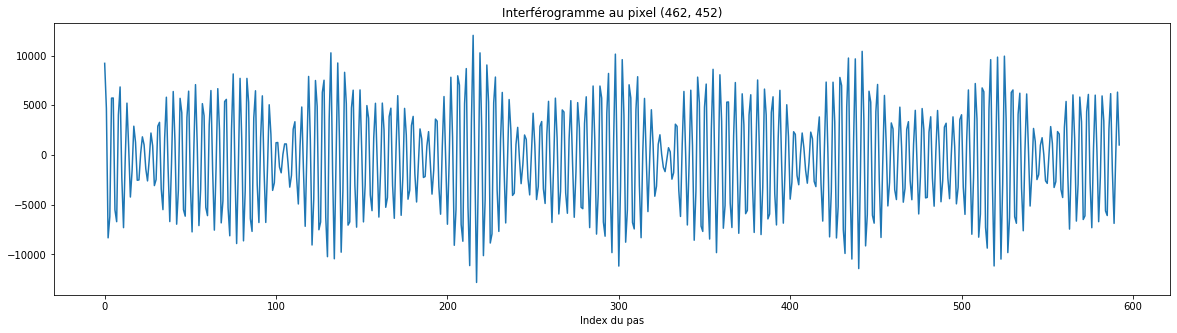

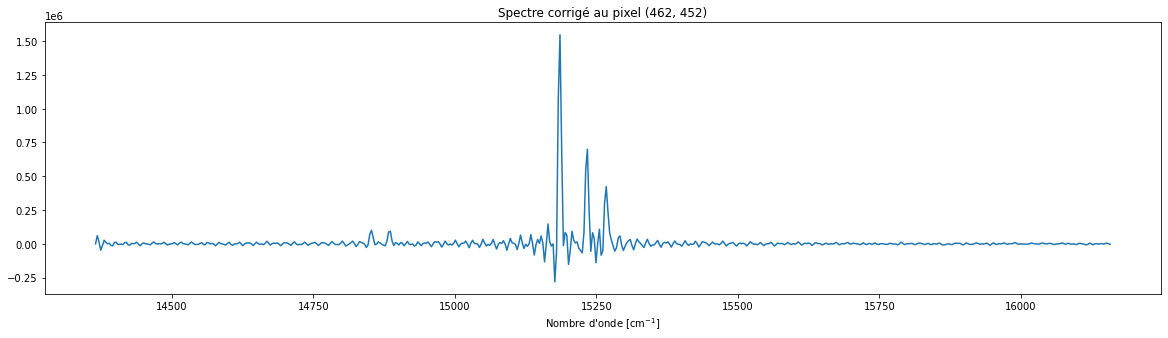

In [24]:
# On teste ici notre fonction avec l'interf√©rogramme de la n√©buleuse au pixel (462, 452).

sln = calcul_spectre(462, 452, sky_phase_fit)   # La phase du spectre du ciel obtenue pr√©c√©demment est suffisante
# pour corriger tous les spectres du cube en premi√®re approximation

pl.figure(figsize=(20,5))
pl.title("Interf√©rogramme au pixel (462, 452)")
pl.plot(sln[0])
pl.xlabel("Index du pas")

pl.figure(figsize=(20,5))
pl.title("Spectre corrig√© au pixel (462, 452)")
pl.plot(sln[1], sln[2].real)  # Afficher la partie r√©elle du vecteur de sortie
pl.xlabel("Nombre d'onde [cm$^{-1}$]")

# On reconna√Æt les diff√©rentes raies d'√©mission attendues dans le spectre. Cela semble donc fonctionner.

√Ä ce stade-ci, vous devriez reconna√Ætre les raies d'√©mission du soufre, de l'azote et de l'hydrog√®ne dans le spectre.

<img src="lines.png" alt="Lines" title="Raies d'√©mission" width=500/>

## Mesure de la vitesse du gaz

Le gaz excit√© par la naine blanche au centre de la n√©buleuse est anim√© d'une vitesse d'expansion. En effet, le gaz que l'on observe est l'atmosph√®re de l'√©toile qui a √©t√© eject√©e durant les phases pr√©c√©dant sa transformation en naine blanche. Cet ejecta n'√©tant que faiblement d√©c√©l√©r√© par le milieu interstellaire qui l'environne (dont la densit√© est tr√®s faible), il continue √† s'√©tendre √† la vitesse moyenne de 25 km/s [Osterbrock, 2006, p.258](https://ui.adsabs.harvard.edu/abs/2006agna.book.....O/abstract). Il se forme donc une sorte de coquille de gaz en expansion dont nous allons essayer de d√©couvrir la forme en 3D. Pour cela, il faut pouvoir mesurer la vitesse d'expansion du gaz le long de la ligne de vis√©e.  Pour ce faire, il suffit de mesurer les longueurs d'onde des raies d'√©mission ($\lambda$). Celles-ci sont d√©cal√©es par rapport √† leur longueur d'onde d'origine $\lambda_0$ par effet Doppler. Ce d√©calage peut √™tre reli√© √† la vitesse relative $v$ entre la source d'√©mission et l'observateur par la formule :

(5) $v = c\frac{\lambda - \lambda_0}{\lambda_0}$,

o√π $c$ est la vitesse de la lumi√®re.

### Ajustement d'un mod√®le aux donn√©es spectrales

Il est pertinent ici de s'attarder sur la forme attendue d'une raie d'√©mission sur le spectre final, dans un cas id√©al. Prenons comme exemple la lumi√®re provenant de la d√©sexcitation de l'hydrog√®ne ionis√© dans la n√©buleuse, √† 656.28 nm. √âtant monochromatique, elle peut √™tre repr√©sent√©e par un sinus pur qui, lorsque mesur√© par SITELLE en d√©pla√ßant le miroir, produira aussi un interf√©rogramme sinuso√Ødal. La transform√©e de Fourier d'un sinus pur est un pic de Dirac dans le spectre, √† la fr√©quence correspondant √† la raie d'hydrog√®ne. Par contre, il faut consid√©rer ici la m√©thode d'acquisition, qui utilise des incr√©ments finis entre chaque position de miroir ainsi qu'un d√©placement fini du miroir. Ces m√©thodes d'√©chantillonnage font en sorte que l'interf√©rogramme obtenu peut √™tre mod√©lis√© comme la multiplication d'un interf√©rogramme complet (infini) et d'une fonction bo√Æte, tel que montr√© √† l'image suivante. La transform√©e de Fourier d'une fonction *bo√Æte* est un sinus cardinal et, sachant, qu'une multiplication dans le domaine spatial √©quivaut √† une convolution dans le domaine fr√©quenciel, la forme attendue pour la raie d'√©mission dans le spectre est un sinus cardinal (la convolution d'une fonction par une distribution de Dirac m√®nera dans le pire des cas √† une translation de cette fonction).

<img src="FFT_sinc.png" alt="Lines" title="Raies d'√©mission" width=500/>

(image tir√©e de Drissen et al. Imaging Fourier Transform Spectroscopy for Astronomy, DOI: 10.5772/15485 (2011))

Nous allons donc utiliser le sinus cardinal (sinc) pour mod√©liser les raies sur le spectre. L'objectif ici est d'obtenir une position plus pr√©cise de la raie sur le spectre. Pour ce faire, nous allons ajuster (*fitter*) un sinus cardinal sur la raie d'int√©r√™t, ce qui devrait nous donner une valeur plus robuste sur sa position dans le spectre que si on consid√©rait seulement le canal contenant la valeur la plus √©lev√©e. L'ajustement ici permet d'obtenir une position avec une r√©solution plus grande que celle de la grille utilis√©e pour les nombres d'onde, en consid√©rant non seulement le canal du maximum de la raie mais aussi les canaux voisins.  Voici le mod√®le √† utiliser, o√π la mise √† l'√©chelle n√©cessaire vous est fournie:

In [17]:
def model_sinc(p,x):
    """:param  x: axe du spectre en canaux (pixels)
       :param p[0]: h: hauteur de base de la raie d'√©mission (offset)
       :param p[1]: a: amplitude de la raie d'√©mission
       :param p[2]: dx: position de la raie d'√©mission en canaux
    """
    return p[0] + p[1] * np.sinc((x - p[2])/tplib.OVERSAMPLING_FACTOR)

**Question 8** - R√©alisez un ajustement sur la raie la plus intense du spectre en utilisant la fonction *scipy.optimize.least_squares()*. Affichez le spectre d'origine ainsi que le spectre ajust√© et affichez les param√®tres trouv√©s. Vous utiliserez 25 canaux de part et d'autre du maximum de la raie pour l'ajustement, et le m√™me pixel (462, 452) que pr√©c√©demment. L'ajustement vous permettra une estimation plus pr√©cise de la position de la raie (param√®tre *dx* du mod√®le, en unit√©s de canal). Transformez cette position en unit√©s de $cm^{-1}$, puis en nm pour calculer la vitesse associ√©e √† ce pixel en km/s, en utilisant l'√©quation Doppler. Vous pouvez utiliser les valeurs initiales suivantes pour l'ajustement: h=0, a=valeur du max, dx=position du max (canal). 

In [88]:
# On d√©bute par identifier la raie la plus intense 
neb_spectrum = np.real(sln[2])

# On d√©fini le premier √©l√©ment de la fonction comme √©tant le neb_axis
neb_axis = np.real(sln[1])


# Les bornes de l'intervalle sont cr√©√©s de mani√®re √† avoir 25 canaux de part et d'autre du maximum √† 271
b1 = neb_spectrum.tolist().index(max(neb_spectrum))-25
b2 = neb_spectrum.tolist().index(max(neb_spectrum))+25+1

x0 = [0, np.real(max(neb_spectrum)), neb_spectrum.tolist().index(max(neb_spectrum))] # Estimation initiale


x = np.array([range(b1, b2)])
def func(p): # Ajustement
    retour = np.real(neb_spectrum[b1:b2]) - model_sinc(p, x)
    return retour[0]

fit = scipy.optimize.least_squares(func, x0)  # Optimiser notre fit

Param√®tres trouv√©s pour le fit : [3.96993155e+04 1.54481885e+06 2.70808897e+02]
Position de la raie la plus intense : 658.517602575744 nm
Vitesse =  53.548549892834835 [km/s]


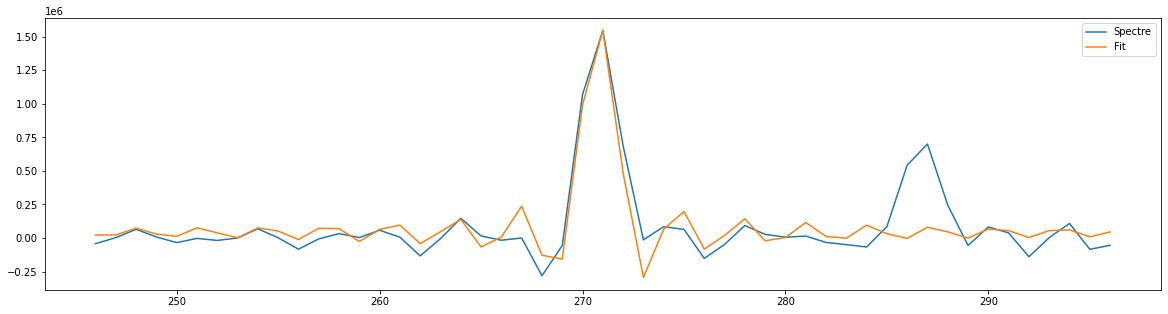

In [89]:
p = fit.x
print("Param√®tres trouv√©s pour le fit :", p)

pl.figure(figsize=(20,5))
pl.xlim()
pl.plot(x[0], np.real(neb_spectrum[b1:b2]), label="Spectre")
pl.plot(x[0], model_sinc(p,x)[0], label="Fit")
pl.legend()

indice = int(round(p[2]))


pos_pic_nm = (neb_axis[indice]**-1) * 10**7
print("Position de la raie la plus intense :", pos_pic_nm, "nm")
lambda0 = 658.4 # [nm] : trouv√©e sur le site https://arxiv.org/pdf/1811.06644.pdf
v = ((pos_pic_nm - lambda0)/lambda0) * (299792458)/ 1000  # √âquation Doppler

print('Vitesse = ', v, '[km/s]')

Pour plus de robustesse, vaut mieux utiliser toute l'information du spectre et pas seulement celle associ√©e √† une seule raie. Les fonctions suivantes peuvent √™tre utilis√©es pour l'ajustement d'un mod√®le √† 7 param√®tres libres (la hauteur h, les amplitudes des 5 raies consid√©r√©es ici, et la vitesse). La position des raies d'√©mission est indiqu√©e dans a librairie tplib. Dans la m√™me librairie se trouve une fonction de conversion des nombres d'onde au canaux (tplib.cm12pix) et la fonction inverse (tplib.pix2cm1), en fonction de la position sur l'imageur.

Ici, on consid√®re que toutes les raies partagent la m√™me vitesse et la m√™me hauteur dans les spectres. Vous remarquerez que la vitesse est un param√®tre du mod√®le ici, alors que plus t√¥t c'est la position dans le spectre qui √©tait ajust√©e. La vitesse pour le pixel (462,452) est calcul√© comme exemple. Le code pr√©sume que le spectre de la n√©buleuse est dans la variable *neb_spectrum*.



In [25]:
# Le spectre associ√© au pixel (462, 452) est d√©fini sous le bon nom de variable, o√π sln a √©t√© calcul√©e au 
# pr√©c√©dent num√©ro.
neb_spectrum = np.real(sln[2])

[2.41461449e+03 8.89793123e+01 7.25375226e+05 4.67413751e+05
 1.57906490e+06 1.04723090e+05 9.58496446e+04]
velocity: 88.97931231758507 km/s


(140.0, 320.0)

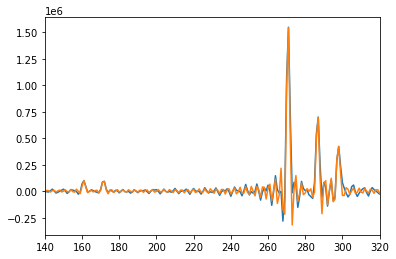

In [26]:
def line_shift(line, velocity): # line must be in nm
    return line * (1 + velocity / tplib.LIGHT_VEL_KMS)

def model_sinc_v(x, line, theta, h, a, v):
    return h + a * np.sinc((x - tplib.cm12pix(1e7/line_shift(line, v), theta))/tplib.OVERSAMPLING_FACTOR)
    
def residual_sinc_v(p, y, line, theta):
    return model_sinc_v(np.arange(y.size), line, theta, p[0], p[1], p[2]) - y

def model_spectrum(x, h, a, v, lines, theta):
    assert len(a) == len(lines)
    spec = np.zeros_like(x, dtype=float)
    for i in range(len(lines)):
        spec += model_sinc_v(x, lines[i], theta, 0, a[i], v)
    spec += h
    return spec

def residual_spectrum(p, y, lines, theta):
    return model_spectrum(np.arange(y.size), p[0], p[2:], p[1], lines, theta) - y.real

lines = (tplib.HA, tplib.NII_1, tplib.NII_2, tplib.SII_1, tplib.SII_2)

#param√®tres initiaux
param = [0]
param += [90]
param += [1e6]*len(lines)

#ajustement sur le spectre
fit = scipy.optimize.least_squares(residual_spectrum, param, args=(neb_spectrum, lines, theta_map[452, 462]))

print(fit.x)
print('velocity:', fit.x[1], 'km/s')
pl.plot(neb_spectrum)
pl.plot(model_spectrum(np.arange(neb_spectrum.size), fit.x[0], fit.x[2:], fit.x[1], lines, theta_map[452, 462]))
pl.xlim(140, 320)

 
Pour la suite, nous allons consid√©rer l'image *deep_frame* (interf√©rogramme somm√©s) qui vous est fournie (M57_df.fits).  Cette image servira √† identifier les pixels ayant re√ßu assez de signal (de lumi√®re) pour fournir un spectre avec des valeurs significatives. Nous allons aussi consid√©rer une r√©gion d'int√©r√™t plus √©troite autour de la n√©buleuse ($y\in [250:520]$ et $x\in [250:580]$), ainsi que les pixels qui ont une valeur d'au moins 5 fois la valeur m√©diane d'une r√©gion de ciel (sans la n√©buleuse). Le code suivant identifie ces pixels pour vous.


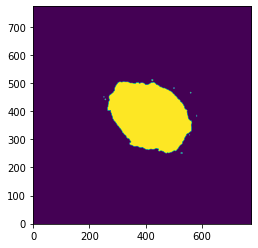

In [20]:
deep_frame = astropy.io.fits.getdata('M57_df.fits')
roi_map = np.zeros_like(deep_frame, dtype=bool)
roi_map[250:520, 250:580] = 1 # nebuleuse
detection_map = deep_frame >  5 * np.nanmedian(deep_frame[:100, :100])
detection_map *= roi_map
pl.imshow(detection_map, origin='lower')

## Calcul de la carte de vitesse

Vous pouvez maintenant estimer la vitesse en tout point en proc√©dant √† un ajustement du mod√®le sur tous les spectres du cube spectral. Pour rendre le calcul plus rapide, nous allons consid√©rer seulement les pixels identifi√©s pr√©c√©demment et pr√©sentant un rapport signal √† bruit int√©ressant. 

**Question 9** - Obtenez la vitesse associ√©e √† ces pixels et pr√©sentez les r√©sultats sous forme de carte de couleur. 



In [62]:
# Indices des pixels consid√©r√©s :
px_i = 250
px_x_f = 580
px_y_f = 520


# Sauvegarder ce vecteur 2D de vitesses pour tracer la carte de couleur
carte_vitesse = np.zeros([580-250, 520-250])

# Pour savoir o√π on en est rendu dans le temps de calcul :
len_tot = len(range(px_i, px_x_f)) * len(range(px_i, px_y_f))
print(len_tot)
i = 0

# Passer sur tous les pixels de la zone consid√©r√©e :
for px_x in range(px_i, px_x_f):
    for px_y in range(px_i, px_y_f):
        
        # Pour savoir o√π on en est rendu dans le temps de calcul :
        if i % 1000 == 0:
            print('iteration : {}/{}'.format(i, len_tot)) 
        i += 1
        
        if detection_map[px_y, px_x]:  # Si c'est un des pixels qu'on consid√®re, poursuivre les calculs.
            # Fonction √©crite √† la question #7 :
            interferogramme, nb_onde, spectre_corrige = calcul_spectre(px_x, px_y, sky_phase_fit)  
            neb_spectrum = np.real(spectre_corrige)
            
            # Ajustement sur le spectre donn√© par le prof √† la question #8 :
            fit = scipy.optimize.least_squares(residual_spectrum, param, args=(neb_spectrum, lines, theta_map[px_y, px_x]))
            
            # Enregistrer la vitesse associ√©e √† ce pixel :
            carte_vitesse[px_x-px_i][px_y-px_i] = fit.x[1]  # km/s

89100
iteration : 0/89100
iteration : 1000/89100
iteration : 2000/89100
iteration : 3000/89100
iteration : 4000/89100
iteration : 5000/89100
iteration : 6000/89100
iteration : 7000/89100
iteration : 8000/89100
iteration : 9000/89100
iteration : 10000/89100
iteration : 11000/89100
iteration : 12000/89100
iteration : 13000/89100
iteration : 14000/89100
iteration : 15000/89100
iteration : 16000/89100
iteration : 17000/89100
iteration : 18000/89100
iteration : 19000/89100
iteration : 20000/89100
iteration : 21000/89100
iteration : 22000/89100
iteration : 23000/89100
iteration : 24000/89100
iteration : 25000/89100
iteration : 26000/89100
iteration : 27000/89100
iteration : 28000/89100
iteration : 29000/89100
iteration : 30000/89100
iteration : 31000/89100
iteration : 32000/89100
iteration : 33000/89100
iteration : 34000/89100
iteration : 35000/89100
iteration : 36000/89100
iteration : 37000/89100
iteration : 38000/89100
iteration : 39000/89100
iteration : 40000/89100
iteration : 41000/89100

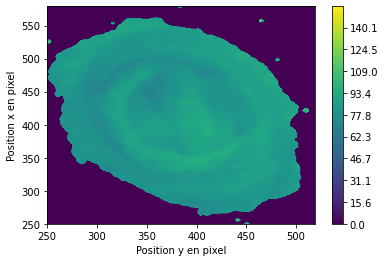

In [85]:
pos_x = np.array([i for i in range(px_i, px_x_f)])
pos_y = np.array([i for i in range(px_i, px_y_f)])

# Red√©finir l'axe x et y par rapport aux pixels initiaux (on ne commence pas au pixel (0, 0)) :
pl.contourf(pos_y, pos_x, carte_vitesse, np.linspace(0, np.amax(carte_vitesse), len(carte_vitesse)))
pl.xlabel("Position y en pixel")
pl.ylabel("Position x en pixel")
pl.colorbar()

# La vitesse est en km/s.

En supposant que votre carte de vitesse est dans la variable *velocity_map*, le code suivant vous permettra d'afficher les vitesses en superposition semi-transparente sur l'image *deepframe*, ce qui donne de meilleures rep√®res visuels.

In [86]:
# Donner le bon nom de variable :
velocity_map = carte_vitesse

(200.0, 600.0)

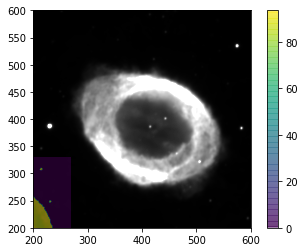

In [87]:
alphas=np.zeros_like(deep_frame)
alphas=0.5
pl.imshow(deep_frame, cmap='gray',origin='lower',vmin=np.percentile(deep_frame, 1), vmax=np.percentile(deep_frame, 99))  
pl.imshow(velocity_map, alpha=alphas, origin='lower', vmin=np.nanpercentile(velocity_map, 1), vmax=np.nanpercentile(velocity_map, 99)) 
pl.colorbar()
pl.xlim(200, 600)
pl.ylim(200, 600)

Voil√†, ceci n'est que le d√©but de l'aventure. Pour mod√©liser en 3D la coquille de gaz, il faudra des efforts supppl√©mentaires dignes d'une ma√Ætrise ou d'un doctorat!